[scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html)
[Scott_Crawford](https://www.youtube.com/watch?v=_67mDWPt26Y)

$$\begin{array}{ccc}
   &\mbox{Goodness of Fit}&\mbox{independence}&\mbox{Homogeneity}&\\
H_0&\mbox{dist}(X)=\mbox{benchmark dist}&X,\ Y\ \mbox{independent}&\mbox{dist}(X|Y=i)=\mbox{dist}(X|Y=j)\\
H_a&\mbox{dist}(X)\not=\mbox{benchmark dist}&X,\ Y\ \mbox{not independent}&\mbox{dist}(X|Y=i)\not=\mbox{dist}(X|Y=j)\\
\mbox{Data}&x\sim X&(x,y)\sim (X,Y)&x_i\sim X|Y=i, x_j\sim X|Y=j\\
\mbox{scipy}&\mbox{scipy.stats.chisquare}&\mbox{scipy.stats.chi2_contingency}&\mbox{scipy.stats.chi2_contingency}
\end{array}$$

$$\begin{array}{ccc}
   &\mbox{Goodness of Fit}&\mbox{Homogeneity}&\\
H_0&\mbox{dist}(X)=\mbox{benchmark dist}&\mbox{dist}(X|Y=i)=\mbox{dist}(X|Y=j)\\
H_a&\mbox{dist}(X)\not=\mbox{benchmark dist}&\mbox{dist}(X|Y=i)\not=\mbox{dist}(X|Y=j)\\
\mbox{Data}&x\sim X&x_i\sim X|Y=i, x_j\sim X|Y=j\\
\mbox{scipy}&\mbox{scipy.stats.chisquare}&\mbox{scipy.stats.chi2_contingency}
\end{array}$$

In [1]:
import numpy as np
import scipy.stats as stats

f_obs = np.array([18, 10, 17, 15, 18, 18]) * 4
f_exp = np.array([16, 16, 16, 16, 16, 16]) * 4

chi2, p_value = stats.chisquare(f_obs, f_exp=f_exp)
print(chi2)
print(p_value)

12.5
0.028543123326167485


In [8]:
import pandas as pd

data = {'O': f_obs, 'E': f_exp}
df = pd.DataFrame(data).transpose()
df.columns = [1,2,3,4,5,6]
df.loc['O-E',:] = df.loc['O',:] - df.loc['E',:]
df.loc['(O-E)^2',:] = (df.loc['O-E',:])**2
df.loc['(O-E)^2/E',:] = df.loc['(O-E)^2',:] / df.loc['E',:]
print(df)

              1      2      3      4     5     6
O          72.0   40.0  68.00  60.00  72.0  72.0
E          64.0   64.0  64.00  64.00  64.0  64.0
O-E         8.0  -24.0   4.00  -4.00   8.0   8.0
(O-E)^2    64.0  576.0  16.00  16.00  64.0  64.0
(O-E)^2/E   1.0    9.0   0.25   0.25   1.0   1.0


$$
\displaystyle
\chi^2_{d}=\sum_{i=1}^k\frac{(O_i-E_i)^2}{E_i}\quad d=k-1
$$

In [7]:
chi2 = np.sum(df.loc['(O-E)^2/E',:])
print(chi2)

12.5


$$
\mbox{DF} = \#\ \mbox{categories} - 1
$$

In [4]:
DF = f_obs.shape[0] - 1
print(DF)

5


<div align="center"><img src="img/Screen Shot 2019-11-09 at 10.24.03 PM.png" width="30%" height="30%"></div>

In [5]:
p_value = 1 - stats.chi2.cdf(chi2, DF)
print(p_value)

0.028543123326167485


/Users/sungchullee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


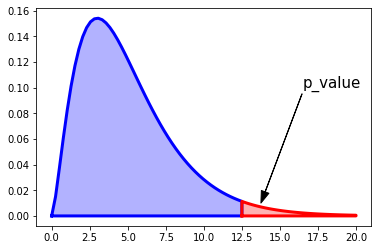

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats

fig, ax = plt.subplots()

df = 5
a = stats.chi2(df)
chi2_statistics = 12.5

x = np.linspace(0,chi2_statistics) 
y = a.pdf(x)
x = np.concatenate([[0], x, [chi2_statistics], [0]])
y = np.concatenate([[0], y, [0], [0]])
ax.fill(x, y, color='b', alpha=0.3)
ax.plot(x, y, color='b', linewidth=3)

x = np.linspace(chi2_statistics, 20, 100)
y = a.pdf(x) 
x = np.concatenate([[chi2_statistics], x, [20], [chi2_statistics]])
y = np.concatenate([[0], y, [0], [0]])
ax.fill(x, y, color='r', alpha=0.3)
ax.plot(x, y, color='r', linewidth=3)

xy = ((12.5 + 15.0) / 2, 0.01)
xytext = (16.5, 0.10)
arrowprops = dict(facecolor='k', color='k', width=0.2, headwidth=8)
ax.annotate('p_value', xy, xytext=xytext, fontsize=15, arrowprops=arrowprops)
        
plt.show()

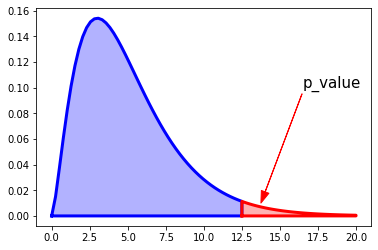

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats

fig, ax = plt.subplots()

df = 5
a = stats.chi2(df)
chi2_statistics = 12.5

x = np.linspace(0,chi2_statistics) 
y = a.pdf(x)
x = np.concatenate([[0], x, [chi2_statistics], [0]])
y = np.concatenate([[0], y, [0], [0]])
ax.fill(x, y, color='b', alpha=0.3)
ax.plot(x, y, color='b', linewidth=3)

x = np.linspace(chi2_statistics, 20, 100)
y = a.pdf(x) 
x = np.concatenate([[chi2_statistics], x, [20], [chi2_statistics]])
y = np.concatenate([[0], y, [0], [0]])
ax.fill(x, y, color='r', alpha=0.3)
ax.plot(x, y, color='r', linewidth=3)

xy = ((12.5 + 15.0) / 2, 0.01)
xytext = (16.5, 0.10)
arrowprops = dict(color='r', width=0.2, headwidth=8)
ax.annotate('p_value', xy, xytext=xytext, fontsize=15, arrowprops=arrowprops)
        
plt.show()